<a href="https://www.kaggle.com/code/riazahmedtamimansari/notebookd524c8297c?scriptVersionId=106928255" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-popular-movies-dataset/n_movies.csv


                    title         year certificate duration  \
0               Cobra Kai     (2018– )       TV-14   30 min   
1               The Crown     (2016– )       TV-MA   58 min   
2        Better Call Saul  (2015–2022)       TV-MA   46 min   
3           Devil in Ohio       (2022)       TV-MA  356 min   
4  Cyberpunk: Edgerunners     (2022– )       TV-MA   24 min   

                          genre  rating  \
0         Action, Comedy, Drama     8.5   
1     Biography, Drama, History     8.7   
2                  Crime, Drama     8.9   
3        Drama, Horror, Mystery     5.9   
4  Animation, Action, Adventure     8.6   

                                         description  \
0  Decades after their 1984 All Valley Karate Tou...   
1  Follows the political rivalries and romance of...   
2  The trials and tribulations of criminal lawyer...   
3  When a psychiatrist shelters a mysterious cult...   
4  A Street Kid trying to survive in a technology...   

                         

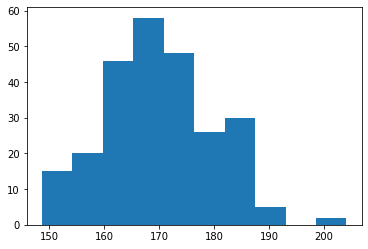

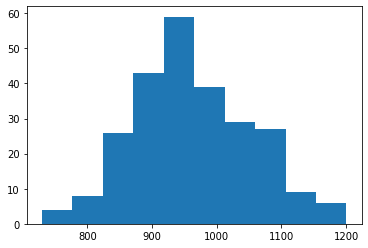

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("../input/netflix-popular-movies-dataset/n_movies.csv")
print(df.head())
import matplotlib.pyplot as plt
import numpy as np

x = np.random.normal(170, 10, 250)

plt.hist(x)
plt.show() 

x = np.random.normal(963, 100, 250)

plt.hist(x)
plt.show() 

